In [1]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import yfinance as yf

#getdata
tlt = yf.download("TLT", start="2002-01-01", end="2022-11-30")

#compute log returns
tlt["log_return"] = np.log(tlt["Adj Close"] / tlt["Adj Close"].shift(1))

#add column for calendar day of month (1-31 & colum for year)
tlt["day_of_month"] = tlt.index.day
tlt["year"] = tlt.index.year

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

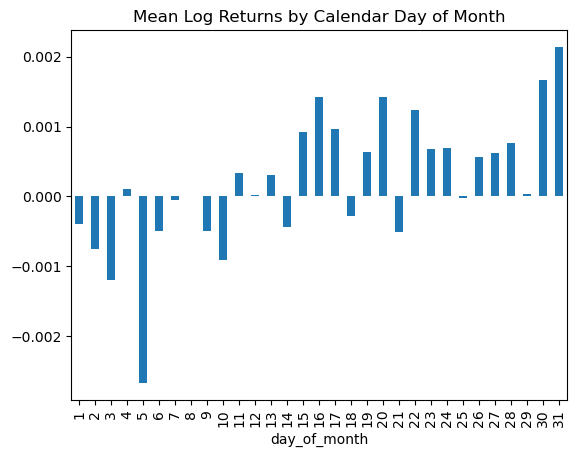

In [2]:
#testing Hypothesis
#mean return on every day of month

grouped_by_day = tlt.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

In [6]:
#naiive strat, buy and hold during last week of month
#short and hold during 1st week of month  || Long last week of month, Short 1st week

#first_week_returns - the daily log return if it’s between the 1st and 7th day of the month, otherwise 0
#last_week_returns - the daily log return if it's on or after the 23rd day of the month, otherwise 0
#last_week_less_first_week - the difference between last_week_returns and first_week_returns

tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[
    tlt.day_of_month <= 7
].log_return

tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[
    tlt.day_of_month >= 23
].log_return

tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns

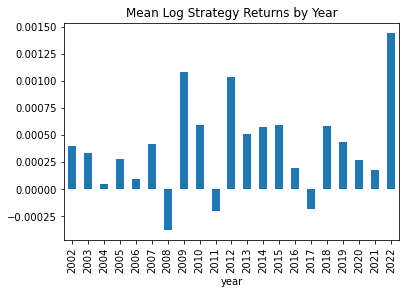

In [7]:
#plot returns
(
    tlt.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

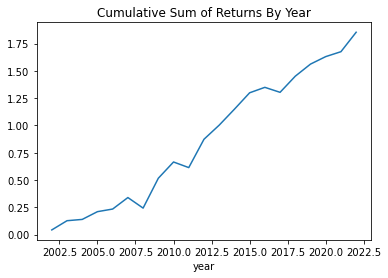

In [8]:
#cumulative returns by year
(
    tlt.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
)

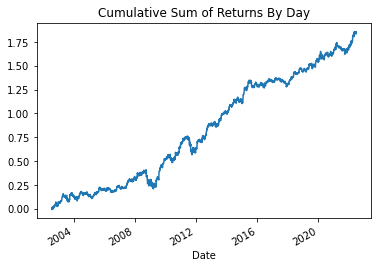

In [9]:
#cumulative returns by day
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")